In [60]:
import pandas as pd
print(pd.__version__)

2.2.3


In [38]:
#print(allData['FIRE_START_DAY'].unique())
#print(allData.dtypes)
fires = allData[(allData['FIRE_START_DAY'] == True) & (allData['YEAR'] > 2000)]
nofires = allData[(allData['FIRE_START_DAY'] == False) & (allData['YEAR'] > 2000)]
print(fires.head())

            DATE  PRECIPITATION  MAX_TEMP  MIN_TEMP  AVG_WIND_SPEED  \
6212  2001-01-03            0.0      82.0      49.0            5.59   
6216  2001-01-07            0.0      69.0      47.0            5.37   
6286  2001-03-18            0.0      70.0      53.0            6.04   
6315  2001-04-16            0.0      63.0      51.0            7.61   
6331  2001-05-02            0.0      66.0      56.0            8.05   

      FIRE_START_DAY  YEAR  TEMP_RANGE  WIND_TEMP_RATIO  MONTH  SEASON  \
6212            True  2001        33.0         0.068171      1  Winter   
6216            True  2001        22.0         0.077826      1  Winter   
6286            True  2001        17.0         0.086286      3  Spring   
6315            True  2001        12.0         0.120794      4  Spring   
6331            True  2001        10.0         0.121970      5  Spring   

      LAGGED_PRECIPITATION  LAGGED_AVG_WIND_SPEED  DAY_OF_YEAR  
6212                   0.0               5.177143            3 

In [21]:
friesByYear = fires.groupby(['FIRE_START_DAY', 'YEAR']).size().reset_index(name='countsPerYear')
print(friesByYear)

    FIRE_START_DAY  YEAR  countsPerYear
0             True  2001            108
1             True  2002            131
2             True  2003            114
3             True  2004            134
4             True  2005            140
5             True  2006            127
6             True  2007            156
7             True  2008            138
8             True  2009            134
9             True  2010            108
10            True  2011            145
11            True  2012            172
12            True  2013            151
13            True  2014            119
14            True  2015            141
15            True  2016            155
16            True  2017            197
17            True  2018            186
18            True  2019            153
19            True  2020            188
20            True  2021            173
21            True  2022            151
22            True  2023            141


In [22]:
fires.groupby(['FIRE_START_DAY', 'SEASON']).size().reset_index(name='countsPerSeason')

,FIRE_START_DAY,SEASON,countsPerSeason
0,True,Fall,865
1,True,Spring,593
2,True,Summer,1703
3,True,Winter,201


In [39]:
max_avg_fires = fires.groupby('MONTH')['MAX_TEMP'].mean()
min_avg_fires = fires.groupby('MONTH')['MIN_TEMP'].mean()

max_avg_nofires = nofires.groupby('MONTH')['MAX_TEMP'].mean()
min_avg_nofires = nofires.groupby('MONTH')['MIN_TEMP'].mean()

print(max_avg_fires - max_avg_nofires)
print(min_avg_fires - min_avg_nofires)

MONTH
1     6.563953
2     6.567825
3     3.603772
4     3.372822
5     1.748095
6     0.930051
7     1.138393
8     0.412155
9     1.637510
10    4.101179
11    3.885614
12    5.546754
Name: MAX_TEMP, dtype: float64
MONTH
1     0.469477
2     1.175656
3    -0.172579
4     1.418811
5     0.934793
6     0.430971
7     0.728490
8     0.262319
9     1.053576
10    1.205351
11    1.222456
12    0.164749
Name: MIN_TEMP, dtype: float64


In [34]:
filtered_fires = fires[fires['MIN_TEMP'] == 35.0]
print(filtered_fires)

            DATE  PRECIPITATION  MAX_TEMP  MIN_TEMP  AVG_WIND_SPEED  \
8415  2007-01-15            0.0      57.0      35.0             3.8   

      FIRE_START_DAY  YEAR  TEMP_RANGE  WIND_TEMP_RATIO  MONTH  SEASON  \
8415            True  2007        22.0         0.066667      1  Winter   

      LAGGED_PRECIPITATION  LAGGED_AVG_WIND_SPEED  DAY_OF_YEAR  
8415                   0.0               6.325714           15  


In [55]:
#windtemp_avg_fires = fires.groupby('MONTH')['WIND_TEMP_RATIO'].mean()
#windtemp_avg_nofires = nofires.groupby('MONTH')['WIND_TEMP_RATIO'].mean()
#print(windtemp_avg_fires - windtemp_avg_nofires)
#print(nofires.groupby('YEAR')['WIND_TEMP_RATIO'].mean())

avg_max_fires = fires.groupby(['YEAR','SEASON'])['MAX_TEMP'].mean()
avg_wind_fires = fires.groupby(['YEAR','SEASON'])['AVG_WIND_SPEED'].mean()

avg_max_nofires = nofires.groupby(['YEAR','SEASON'])['MAX_TEMP'].mean()
avg_wind_nofires = nofires.groupby(['YEAR','SEASON'])['AVG_WIND_SPEED'].mean()

wind_temp_fires_df = pd.DataFrame({
    'avg_max_fires': avg_max_fires,
    'avg_wind_fires': avg_wind_fires,
    #'avg_max_nofires': avg_max_nofires,
    #'avg_wind_nofires': avg_wind_nofires
})

wind_temp_nofires_df = pd.DataFrame({
    'avg_max_nofires': avg_max_nofires,
    'avg_wind_nofires': avg_wind_nofires
})

In [66]:
print(wind_temp_fires_df.head(8))
#print(wind_temp_nofires_df.head(8))
print(wind_temp_fires_df.tail(8))

             avg_max_fires  avg_wind_fires
YEAR SEASON                               
2001 Fall        72.947368        6.781579
     Spring      68.642857        7.877143
     Summer      73.736111        7.814167
     Winter      77.000000        5.890000
2002 Fall        73.476190        6.865000
     Spring      67.000000        7.809091
     Summer      72.870968        7.793226
     Winter      78.800000        6.534000
             avg_max_fires  avg_wind_fires
YEAR SEASON                               
2022 Fall        80.000000        7.019459
     Spring      70.473684        8.389211
     Summer      75.694444        8.143056
     Winter      69.250000        6.932500
2023 Fall        75.846154        6.555128
     Spring      66.285714        7.712857
     Summer      73.554054        7.898649
     Winter      74.571429        5.337143


In [62]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


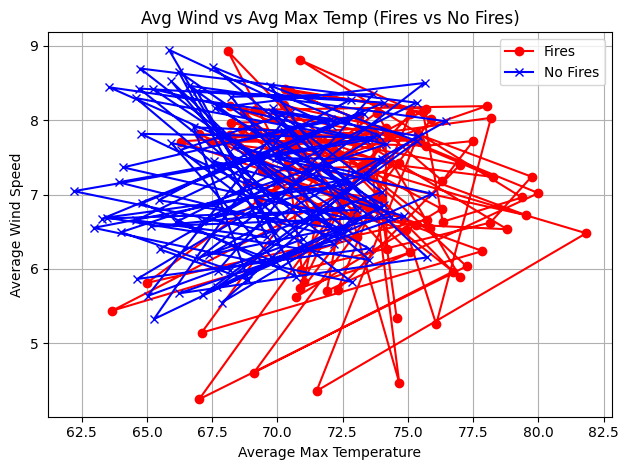

In [63]:
# Plot fires
plt.plot(
    wind_temp_fires_df['avg_max_fires'],
    wind_temp_fires_df['avg_wind_fires'],
    label='Fires',
    color='red',
    marker='o'
)

# Plot no fires
plt.plot(
    wind_temp_nofires_df['avg_max_nofires'],
    wind_temp_nofires_df['avg_wind_nofires'],
    label='No Fires',
    color='blue',
    marker='x'
)

# Labels and legend
plt.xlabel('Average Max Temperature')
plt.ylabel('Average Wind Speed')
plt.title('Avg Wind vs Avg Max Temp (Fires vs No Fires)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

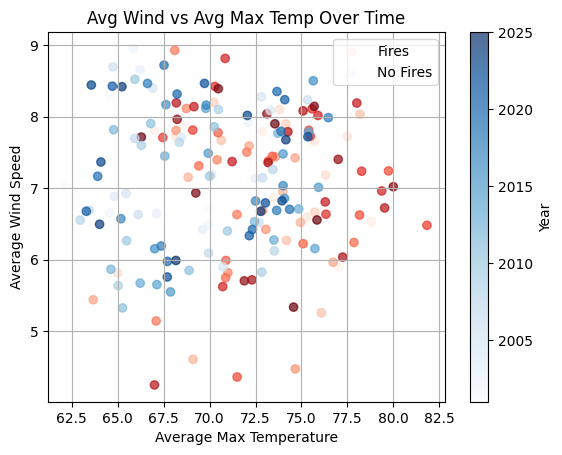

In [64]:

import numpy as np

# Extract years from index
years_fires = wind_temp_fires_df.index.get_level_values('YEAR')
years_nofires = wind_temp_nofires_df.index.get_level_values('YEAR')

# Create scatter plot with color mapped to year
plt.scatter(wind_temp_fires_df['avg_max_fires'], wind_temp_fires_df['avg_wind_fires'],
            c=years_fires, cmap='Reds', label='Fires', alpha=0.7)

plt.scatter(wind_temp_nofires_df['avg_max_nofires'], wind_temp_nofires_df['avg_wind_nofires'],
            c=years_nofires, cmap='Blues', label='No Fires', alpha=0.7)

# Labels and legend
plt.xlabel('Average Max Temperature')
plt.ylabel('Average Wind Speed')
plt.title('Avg Wind vs Avg Max Temp Over Time')
plt.colorbar(label='Year')  # Add a color bar to show time progression
plt.legend()
plt.grid(True)
plt.show()

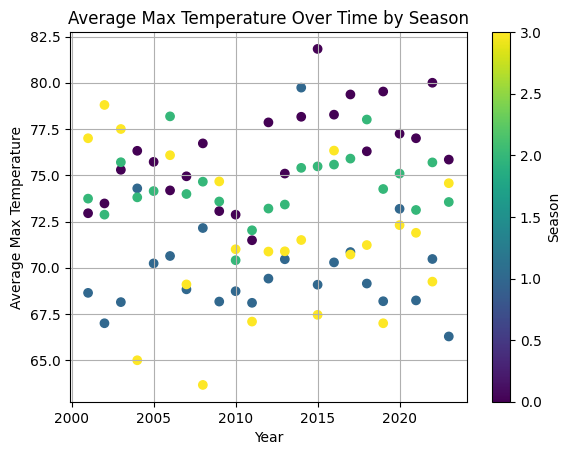

In [75]:
# Create a scatter plot
# Group by YEAR and SEASON, calculate mean MAX_TEMP
avg_max_temp = fires.groupby(['YEAR', 'SEASON'])['MAX_TEMP'].mean().reset_index()

# Create a scatter plot
plt.scatter(avg_max_temp['YEAR'], avg_max_temp['MAX_TEMP'], c=avg_max_temp['SEASON'].astype('category').cat.codes, cmap='viridis')

# Labels and title
plt.xlabel('Year')
plt.ylabel('Average Max Temperature')
plt.title('Average Max Temperature Over Time by Season')

# Show color bar to represent seasons
plt.colorbar(label='Season')
plt.grid(True)

plt.show()

In [88]:
# Create a scatter plot
firesByYear = fires.groupby(['YEAR', 'SEASON'])[''].mean().reset_index()

KeyError: 'Column not found: '

    YEAR  SEASON  countsPerSeason
0   2001    Fall               19
1   2001  Spring               14
2   2001  Summer               72
3   2001  Winter                3
4   2002    Fall               42
..   ...     ...              ...
86  2022  Winter                4
87  2023    Fall               39
88  2023  Spring               21
89  2023  Summer               74
90  2023  Winter                7

[91 rows x 3 columns]


Text(0.5, 1.0, 'Number of Fires Over Time by Season')

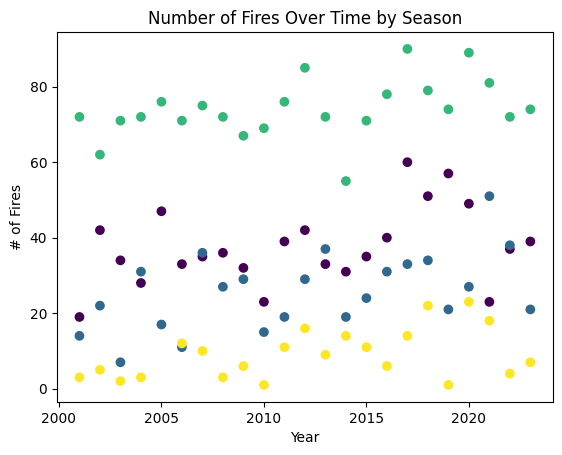

In [89]:
firesByYearBySeason = fires.groupby(['YEAR', 'SEASON']).size().reset_index(name='countsPerSeason')
print(friesByYearBySeason)
# Create a scatter plot
plt.scatter(friesByYearBySeason['YEAR'], friesByYearBySeason['countsPerSeason'], c=friesByYearBySeason['SEASON'].astype('category').cat.codes, cmap='viridis')
# Labels and title
plt.xlabel('Year')
plt.ylabel('# of Fires')
plt.title('Number of Fires Over Time by Season')

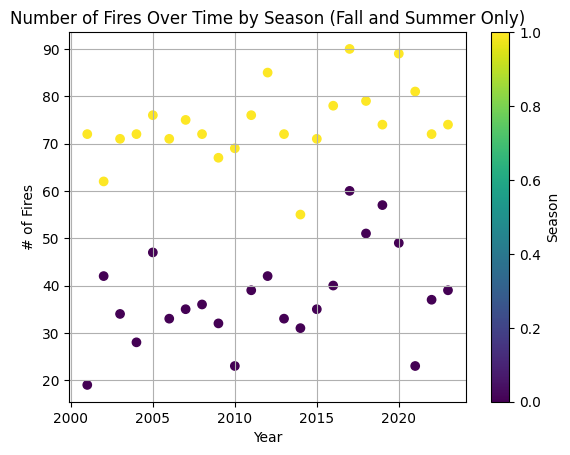

In [93]:
firesByYearInSumFal = firesByYearBySeason[firesByYearBySeason['SEASON'].isin(['Fall', 'Summer'])]
#print(firesByYearInSumFal)
# Create a scatter plot
plt.scatter(firesByYearInSumFal['YEAR'], firesByYearInSumFal['countsPerSeason'], c=firesByYearInSumFal['SEASON'].astype('category').cat.codes, cmap='viridis')
# Labels and title
plt.xlabel('Year')
plt.ylabel('# of Fires')
plt.title('Number of Fires Over Time by Season (Fall and Summer Only)')
plt.colorbar(label='Season')
plt.grid(True)
plt.show()